# Verbindung zur SQLite DB aufbauen

In [1]:
import sqlite3
db = sqlite3.connect("Data/tuweather.db")
result = db.execute("select * from weather limit 5");
for row in result:
    print(row)
 

(16, 29.25, 'Rain', 23.33, 23.15, 21.06, 24.93, 1002, 55, 0.89, 113, 2.68, 40, 1628308265, 1628362957, '2021-08-07 14:50:04', 0.37)
(17, 29.375, 'Clouds', 23.21, 23.13, 21.06, 25.49, 1002, 59, 4.12, 190, 9.26, 40, 1628308265, 1628362957, '2021-08-07 15:00:04', 0.0)
(18, 29.75, 'Clouds', 23.36, 23.27, 21.06, 25.57, 1001, 58, 5.14, 210, 0.0, 40, 1628308265, 1628362957, '2021-08-07 15:10:04', 0.0)
(19, 29.687, 'Clouds', 23.36, 23.27, 21.06, 25.57, 1001, 58, 5.14, 210, 0.0, 40, 1628308265, 1628362957, '2021-08-07 15:20:04', 0.0)
(20, 29.625, 'Clouds', 23.74, 23.61, 21.98, 24.96, 1001, 55, 0.89, 113, 2.24, 40, 1628308265, 1628362957, '2021-08-07 15:30:04', 0.0)


## Temperaturverlauf vom 1. Juni 2022 bis 5. Juni 2022

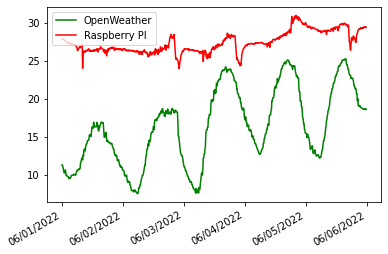

In [2]:
import matplotlib.pyplot as plt;
import datetime as dt
import matplotlib.dates as mdates

result = db.execute('select * from weather where Timestamp between "2022-06-01 00:00:00" and "2022-06-05 23:59:59"');

temp=list()
pitemp=list()
dat=list()
for row in result:
    temp.append(row[3])
    pitemp.append(row[1])
    dat.append(row[15])

x = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S') for d in dat]

fig,ax = plt.subplots()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
ax.plot(x,temp,"g",label="OpenWeather")
ax.plot(x,pitemp,"r",label="Raspberry PI")
plt.legend(loc="upper left")
plt.gcf().autofmt_xdate()

## Wie war die Temperaturverteilung vom Jan. 2022 bis Juni 2022?

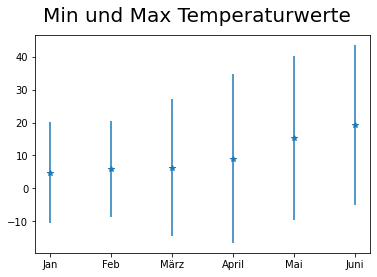

In [3]:
import matplotlib.pyplot as plt
import numpy as np

result = db.execute('select max(temp),min(temp),avg(temp) from weather where Timestamp between "2022-01-01 00:00:00" and "2022-06-31 23:59:59" group by strftime("%m", Timestamp)');

x = np.array(["Jan", "Feb", "März", "April", "Mai","Juni"])
y = np.array([])
e = np.array([])

for row in result:
    e=np.append(e,row[0]-row[1])
    y=np.append(y,row[2])
    #print(row)

plt.errorbar(x, y, e, linestyle='None', marker='*')
plt.suptitle('Min und Max Temperaturwerte', fontsize=20)
plt.show()


## Gibt es eine Verbindung von Lufttemperatur und Luftfeuchte?

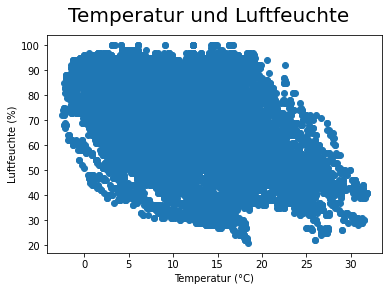

In [4]:
result = db.execute('select temp, humidity from weather where Timestamp between "2022-01-01 00:00:00" and "2022-06-31 23:59:59"');

x = np.array([])
y = np.array([])

for row in result:
    x=np.append(x,row[0])
    y=np.append(y,row[1])
    #print(row)

plt.scatter(x, y)
plt.suptitle('Temperatur und Luftfeuchte', fontsize=20)
plt.xlabel("Temperatur (°C)") 
plt.ylabel("Luftfeuchte (%)") 
plt.show()


# Wie Warm ist es im Schnitt zur einer gegeben Uhrzeit im Juni?

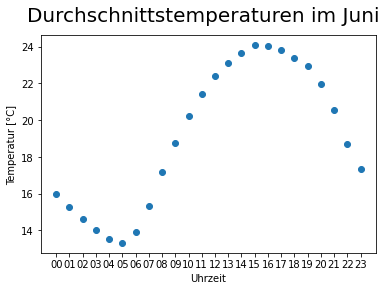

In [11]:
result = db.execute('select avg(temp),strftime("%H", timestamp) from weather where Timestamp between "2022-06-01 00:00:00" and "2022-06-31 23:59:59" group by strftime("%H", timestamp)');

x = np.array([])
y = np.array([])

for row in result:
    x=np.append(x,row[0])
    y=np.append(y,row[1])
    #print(row)

plt.scatter(y, x)
plt.suptitle('Durchschnittstemperaturen im Juni', fontsize=20)
plt.xlabel("Uhrzeit") 
plt.ylabel("Temperatur [°C]") 
plt.show()


# Gibt es einen Zusammenhang zwischen Luftdruck und Bewölkung?

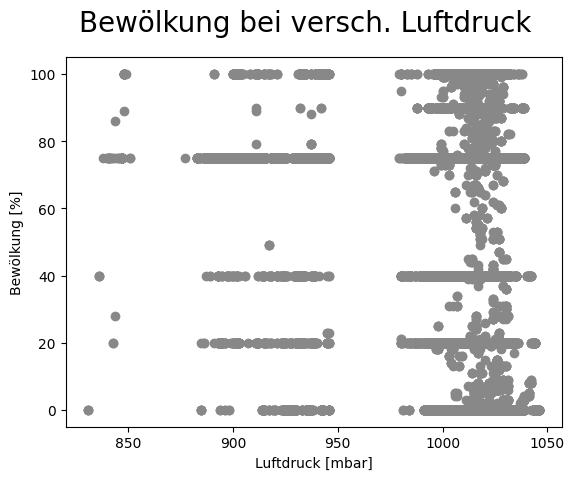

In [9]:
import matplotlib.pyplot as plt
import numpy as np
result = db.execute('select pressure,clouds_all from weather');

x = np.array([])
y = np.array([])

data = result.fetchall()
x = [i[0] for i in data]
y = [i[1] for i in data]

plt.scatter(x, y,color="#888888")
plt.suptitle('Bewölkung bei versch. Luftdruck', fontsize=20)
plt.xlabel("Luftdruck [mbar]") 
plt.ylabel("Bewölkung [%]") 
plt.show()